In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline


In [41]:
plt.style.use('default')
#sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [42]:
df = pd.read_csv('train.csv', encoding= 'utf-8')
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [44]:
df['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

In [45]:
df['Last_Activity'].value_counts()

NaT    16947
Name: Last_Activity, dtype: int64

In [46]:
df['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

Elimino la columna de "Prod_Category_A" y ya que todos los valores son los mismos, lo que lo hace una columna inutil 

In [47]:
df.drop(columns=['Prod_Category_A'], inplace = True)
df.drop(columns=['Last_Activity'], inplace = True)
df.drop(columns=['Actual_Delivery_Date'], inplace = True)

In [48]:
df = df.astype({'Region': 'category',\
                'Territory': 'category',\
                'Pricing, Delivery_Terms_Quote_Appr': 'bool_',\
                'Pricing, Delivery_Terms_Approved': 'bool_',\
                'Bureaucratic_Code_0_Approval': 'bool_',\
                'Bureaucratic_Code_0_Approved': 'bool_',\
                'Submitted_for_Approval': 'bool_',\
                'Bureaucratic_Code': 'category',\
                'Source ': 'category',\
                'Billing_Country': 'category',\
                'Opportunity_Name': 'category',\
                'Opportunity_ID': 'category',\
                #'Sales_Contract_No': 'int64',\
                'Account_Owner': 'category',\
                'Opportunity_Owner': 'category',\
                'Account_Type': 'category',\
                'Opportunity_Type': 'category',\
                #'Quote_Type': 'category',\ non binding y binding
                'Delivery_Terms': 'category',\
                'Brand': 'category',\
                'Product_Type': 'category',\
                'Size': 'category',\
                'Product_Category_B': 'category',\
                #'Price': 'category',\ PRECIO FLoAT
                'Currency': 'category',\
                'Last_Modified_By': 'category',\
                'Product_Family': 'category',\
                'Product_Name': 'category',\
                'ASP_Currency': 'category',\
                'ASP_(converted)_Currency': 'category',\
                #'Month': 'category',\ FECHA
                'Delivery_Quarter': 'category',\
                #'Delivery_Year': 'category',\ FECHA
                'Total_Amount_Currency': 'category',\
                'Total_Taxable_Amount_Currency': 'category',\
                'Stage': 'category'})

In [49]:
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 4   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 5   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 6   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 7   Submitted_for_Approval              16947 non-null  bool          
 8   Bureaucratic_Code                   16947 non-null  category      
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [51]:
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,...,2016-06-30,2016 - 5,Q2,2016,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost
1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,...,2016-01-20,2016 - 1,Q1,2016,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won
2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,...,2016-01-25,2016 - 1,Q1,2016,0,USD,"83,865.60",USD,"83,865.60",Closed Won
3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,2018-03-31,2018 - 2,Q1,2018,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost
4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,2018-02-28,2018 - 2,Q1,2018,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-03-25,2016 - 3,Q1,2016,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won
16943,8786,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-04-08,2016 - 4,Q2,2016,0,EUR,"93,015.00",EUR,"299,715.00",Closed Won
16944,8792,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-03-31,2016 - 3,Q1,2016,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won
16945,28561,Americas,NE America,True,True,True,True,False,Bureaucratic_Code_4,2015-10-20,...,2016-04-29,2016 - 4,Q2,2016,4,USD,"2,346,796.88",USD,0.00,Closed Lost


In [52]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [53]:
stage_list = ['Closed Won','Closed Lost']

In [54]:
df['Bureaucratic_Code'].value_counts(dropna = False)

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [55]:
bure_code_heat = df.pivot_table(index='Bureaucratic_Code', columns='Stage',\
                                values='ID', aggfunc='count')
bure_code_heat

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Bureaucratic_Code,,,,,
Bureaucratic_Code_0,nan,51.00,nan,nan,nan
Bureaucratic_Code_1,159.00,102.00,nan,nan,nan
Bureaucratic_Code_2,128.00,114.00,nan,nan,nan
Bureaucratic_Code_3,1.00,1.00,nan,nan,nan
Bureaucratic_Code_4,"4,291.00","8,253.00",17.00,26.00,nan
Bureaucratic_Code_5,"2,771.00","1,011.00",1.00,9.00,11.00
Bureaucratic_Code_6,nan,1.00,nan,nan,nan


In [56]:
bure_code_heat.columns = bure_code_heat.columns.tolist()
bure_code_heat = bure_code_heat.reset_index().drop(columns=['Bureaucratic_Code'])
bure_code_heat

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,nan,51.00,nan,nan,nan
1,159.00,102.00,nan,nan,nan
2,128.00,114.00,nan,nan,nan
3,1.00,1.00,nan,nan,nan
4,"4,291.00","8,253.00",17.00,26.00,nan
5,"2,771.00","1,011.00",1.00,9.00,11.00
6,nan,1.00,nan,nan,nan


Text(738.7222222222225, 0.5, 'Codigo burocratico')

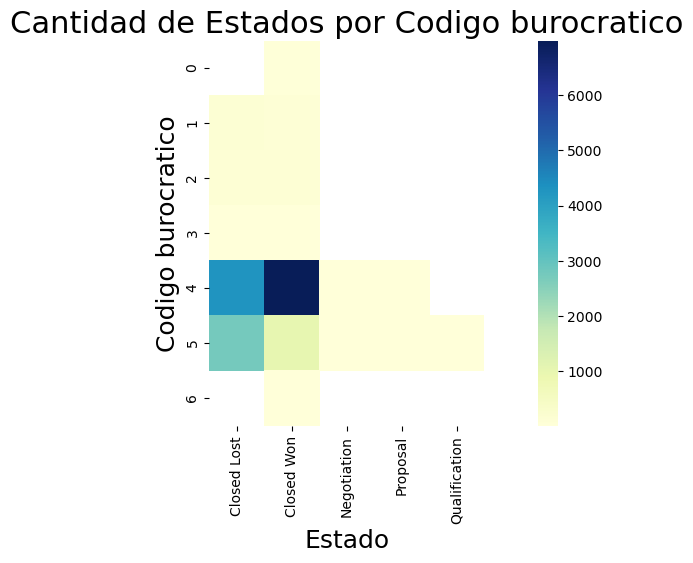

In [57]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(bure_code_heat,  cmap="YlGnBu", ax=ax, robust=True, square=True)
g.set_title("Cantidad de Estados por Codigo burocratico", fontsize=22)
g.set_xlabel("Estado",fontsize=18)
g.set_ylabel("Codigo burocratico", fontsize=18)

In [58]:
df['Account_Owner'].value_counts()

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     326
Person_Name_42     304
Person_Name_66     258
Person_Name_60     227
Person_Name_49     201
Person_Name_59     201
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_21     166
Person_Name_5      166
Person_Name_55     138
Person_Name_63     138
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      72
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      15
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_25       7
Person_Name_36       7
Person_Name_23       4
Person_Name_34       3
Person_Name

In [59]:
s_own = df['Account_Owner'].value_counts()
lista = s_own[s_own > 100].index.tolist()
df_own = df[(df['Account_Owner'].isin(lista)) & (df['Stage'].isin(stage_list))]
df_own

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,True,True,True,True,False,Bureaucratic_Code_4,2015-06-16,...,2016-06-30,2016 - 5,Q2,2016,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost
1,27760,EMEA,None,False,False,False,False,False,Bureaucratic_Code_4,2015-06-16,...,2016-01-20,2016 - 1,Q1,2016,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won
2,27446,Americas,NW America,False,False,False,False,False,Bureaucratic_Code_4,2015-04-21,...,2016-01-25,2016 - 1,Q1,2016,0,USD,"83,865.60",USD,"83,865.60",Closed Won
3,16808,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,2018-03-31,2018 - 2,Q1,2018,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost
4,16805,Americas,NW America,True,False,True,False,False,Bureaucratic_Code_5,2013-07-27,...,2018-02-28,2018 - 2,Q1,2018,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-03-25,2016 - 3,Q1,2016,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won
16943,8786,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-04-08,2016 - 4,Q2,2016,0,EUR,"93,015.00",EUR,"299,715.00",Closed Won
16944,8792,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-03-31,2016 - 3,Q1,2016,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won
16945,28561,Americas,NE America,True,True,True,True,False,Bureaucratic_Code_4,2015-10-20,...,2016-04-29,2016 - 4,Q2,2016,4,USD,"2,346,796.88",USD,0.00,Closed Lost


In [60]:
df_pivot_own = df_own.pivot_table(index='Account_Owner', columns='Stage',\
                                values='ID', aggfunc='count').sort_values(by = ['Closed Won'], ascending = False)
df_pivot_own

Stage,Closed Lost,Closed Won
Account_Owner,,
Person_Name_50,1299,2423
Person_Name_13,436,891
Person_Name_8,523,763
Person_Name_43,508,727
Person_Name_18,496,597
Person_Name_32,110,571
Person_Name_65,127,504
Person_Name_64,189,380
Person_Name_4,361,301


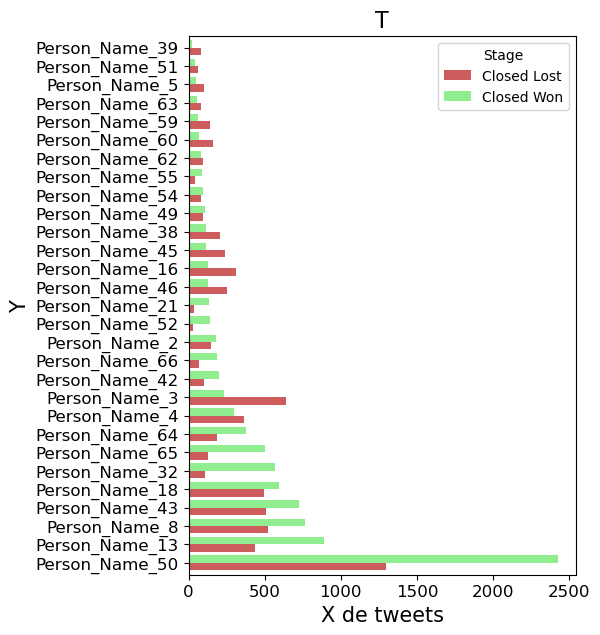

In [61]:
az = df_pivot_own.plot(kind='barh', fontsize=12, color=["indianRed","lightGreen"],width=0.8,figsize=(5, 7))
az.set_title('T', fontsize=16);
az.set_xlabel('X de tweets', fontsize=15);
az.set_ylabel('Y', fontsize=15);

In [62]:
top8 = df_pivot_own.head(8).index.tolist()

In [63]:
df_top8_vend = df[(df['Account_Owner'].isin(top8)) & \
                  (df['Stage'].isin(stage_list)) & \
                  (df['Pricing, Delivery_Terms_Quote_Appr'] == True) & \
                  (df['Pricing, Delivery_Terms_Approved'] == True)]
df_top8_vend

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
7,27455,Americas,NW America,True,True,True,True,False,Bureaucratic_Code_4,2015-04-21,...,2016-01-25,2016 - 1,Q1,2016,0,USD,"50,688.00",USD,"50,688.00",Closed Won
65,24444,Japan,None,True,True,False,False,False,Bureaucratic_Code_4,2015-04-20,...,2016-01-08,2016 - 1,Q1,2016,0,JPY,"243,360.00",JPY,"243,360.00",Closed Won
68,4920,EMEA,United Kingdom,True,True,False,False,False,Bureaucratic_Code_4,2015-12-10,...,2016-02-24,2016 - 2,Q1,2016,3,EUR,"1,556,587.50",EUR,"1,556,587.50",Closed Lost
69,17590,EMEA,Germany,True,True,True,True,False,Bureaucratic_Code_4,2013-07-27,...,2017-05-26,2017 - 4,Q2,2017,1,EUR,"549,780.00",EUR,"549,780.00",Closed Lost
79,18279,EMEA,Germany,True,True,True,True,False,Bureaucratic_Code_4,2013-12-20,...,2016-06-30,2016 - 5,Q2,2016,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16926,19066,Japan,Japan,True,True,True,True,False,Bureaucratic_Code_4,2013-08-11,...,2016-02-26,2016 - 2,Q1,2016,0,JPY,"13,860,000.00",JPY,"13,860,000.00",Closed Won
16939,18324,EMEA,Norway,True,True,False,False,False,Bureaucratic_Code_4,2013-07-27,...,2016-04-21,2016 - 4,Q2,2016,1,EUR,"401,700.00",EUR,"401,700.00",Closed Won
16942,8781,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-03-25,2016 - 3,Q1,2016,0,EUR,"103,350.00",EUR,"299,715.00",Closed Won
16943,8786,EMEA,Austria,True,True,True,True,False,Bureaucratic_Code_4,2016-01-15,...,2016-04-08,2016 - 4,Q2,2016,0,EUR,"93,015.00",EUR,"299,715.00",Closed Won


In [64]:
df_pivot_own1 = df_top8_vend.pivot_table(index='Account_Owner', columns='Stage',\
                                values='ID', aggfunc='count').sort_values(by = ['Closed Won'], ascending = False)
df_pivot_own1

Stage,Closed Lost,Closed Won
Account_Owner,,
Person_Name_50,104,2370
Person_Name_32,57,489
Person_Name_8,298,460
Person_Name_13,219,438
Person_Name_65,32,373
Person_Name_43,307,341
Person_Name_18,332,287
Person_Name_64,64,151


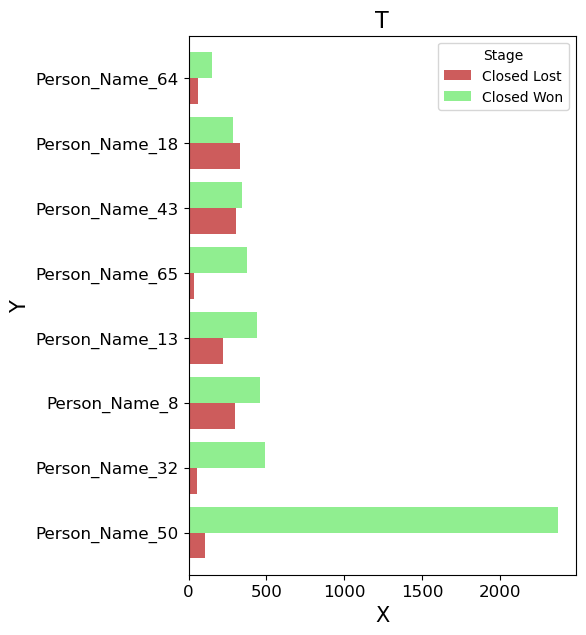

In [65]:
az = df_pivot_own1.plot(kind='barh', fontsize=12, color=["indianRed","lightGreen"],width=0.8,figsize=(5, 7))
az.set_title('T', fontsize=16);
az.set_xlabel('X', fontsize=15);
az.set_ylabel('Y', fontsize=15);

In [66]:
df['Last_Modified_Date'].value_counts(dropna = False)

2018-02-08    5821
2016-12-04    2673
2018-09-06     257
2018-09-26     206
2018-06-09     187
              ... 
2016-02-12       1
2017-01-02       1
2015-07-21       1
2015-11-09       1
2016-09-23       1
Name: Last_Modified_Date, Length: 650, dtype: int64

In [67]:
df['Opportunity_Created_Date'].value_counts()

2017-06-30    124
2016-01-22    107
2017-05-09    104
2016-05-18     99
2016-01-07     89
             ... 
2016-06-11      1
2017-01-08      1
2015-08-27      1
2015-11-18      1
2015-03-02      1
Name: Opportunity_Created_Date, Length: 1096, dtype: int64

In [68]:
df['Opportunity_Created_Date_MM'] = pd.DatetimeIndex(df['Opportunity_Created_Date']).month.astype(int)
df['Opportunity_Created_Date_MM'].value_counts()

5     1596
10    1580
1     1545
6     1509
12    1508
3     1476
9     1391
4     1384
11    1339
7     1301
2     1272
8     1046
Name: Opportunity_Created_Date_MM, dtype: int64

In [69]:
pf_pivot_MM = df[df['Stage'].isin(stage_list)].pivot_table(index='Opportunity_Created_Date_MM', columns='Stage',\
                                values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
pf_pivot_MM

Stage,Closed Lost,Closed Won
Opportunity_Created_Date_MM,,
1,742,803
2,685,587
3,616,859
4,529,855
5,638,958
6,640,869
7,554,747
8,416,627
9,616,772


In [70]:
index = pf_pivot_MM.index.tolist()

Text(0.5, 1.0, 'T')

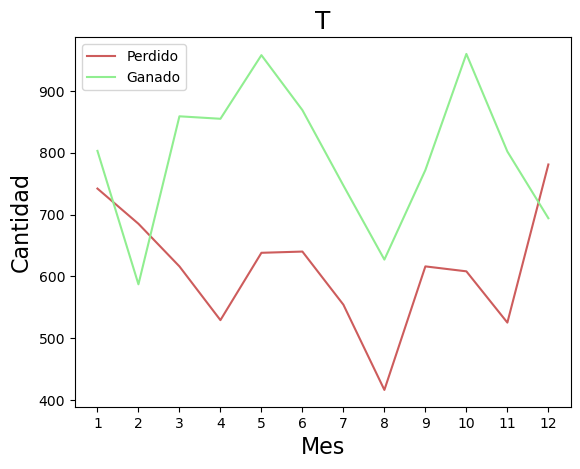

In [71]:
b = pf_pivot_MM[['Closed Lost','Closed Won']].plot(xticks = index ,color= ['indianRed','lightGreen'])
b.legend(["Perdido", "Ganado"])
b.set_ylabel('Cantidad',fontsize=16)
b.set_xlabel('Mes',fontsize=16)
b.set_title("T", fontsize=18)#, bbox=dict(facecolor='green', alpha=0.5))

In [95]:
df['Opportunity_Created_Date_YYYY'] = pd.DatetimeIndex(df['Opportunity_Created_Date']).year.astype(int)

In [96]:
df_won = df[df['Stage'] == 'Closed Won']
df_lost = df[df['Stage'] == 'Closed Lost']

In [97]:
heat_timeW = df_won[df_won['Stage'].isin(stage_list)].pivot_table(index='Opportunity_Created_Date_YYYY', columns='Opportunity_Created_Date_MM',\
                                values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
heat_timeW

Opportunity_Created_Date_MM,1,2,3,4,5,6,7,8,9,10,11,12
Opportunity_Created_Date_YYYY,,,,,,,,,,,,
2014,nan,nan,nan,nan,2.00,2.00,nan,2.00,nan,1.00,nan,10.00
2015,nan,1.00,6.00,8.00,41.00,7.00,4.00,3.00,43.00,24.00,36.00,103.00
2016,150.00,100.00,140.00,163.00,107.00,129.00,242.00,170.00,201.00,232.00,245.00,219.00
2017,282.00,301.00,469.00,428.00,507.00,503.00,297.00,260.00,345.00,435.00,303.00,239.00
2018,371.00,185.00,244.00,256.00,301.00,228.00,204.00,192.00,183.00,268.00,218.00,123.00


Text(145.72222222222223, 0.5, 'Año')

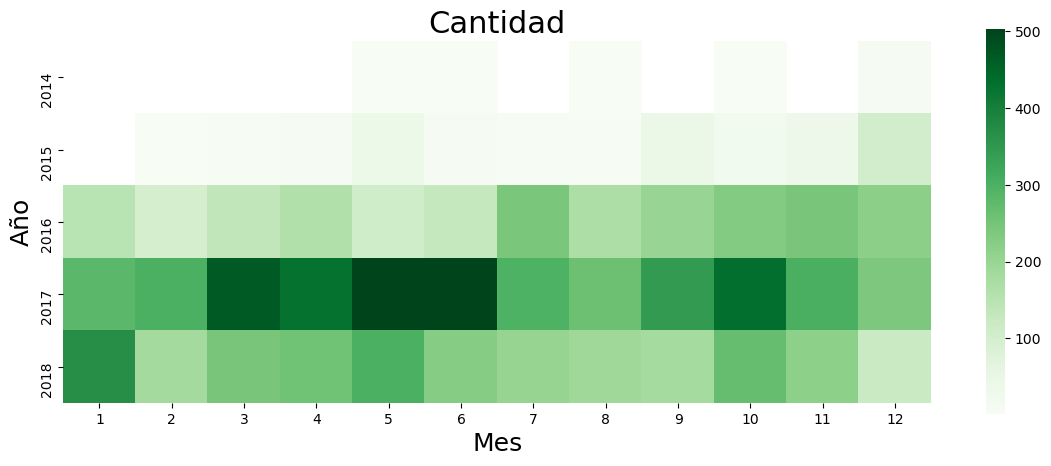

In [98]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(heat_timeW,  cmap="Greens", ax=ax, robust=True, square=True)
g.set_title("Cantidad", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

In [100]:
heat_timeL = df_lost[df_lost['Stage'].isin(stage_list)].pivot_table(index='Opportunity_Created_Date_YYYY', columns='Opportunity_Created_Date_MM',\
                                values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
heat_timeL

Opportunity_Created_Date_MM,1,2,3,4,5,6,7,8,9,10,11,12
Opportunity_Created_Date_YYYY,,,,,,,,,,,,
2013,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan
2014,nan,nan,3.00,nan,1.00,nan,2.00,nan,9.00,6.00,nan,2.00
2015,9.00,6.00,6.00,40.00,14.00,21.00,43.00,39.00,193.00,63.00,110.00,192.00
2016,307.00,273.00,188.00,141.00,195.00,143.00,164.00,106.00,146.00,192.00,111.00,291.00
2017,170.00,189.00,245.00,213.00,251.00,315.00,143.00,127.00,189.00,235.00,205.00,269.00
2018,256.00,217.00,174.00,135.00,177.00,161.00,202.00,144.00,79.00,112.00,98.00,27.00


Text(145.72222222222223, 0.5, 'Año')

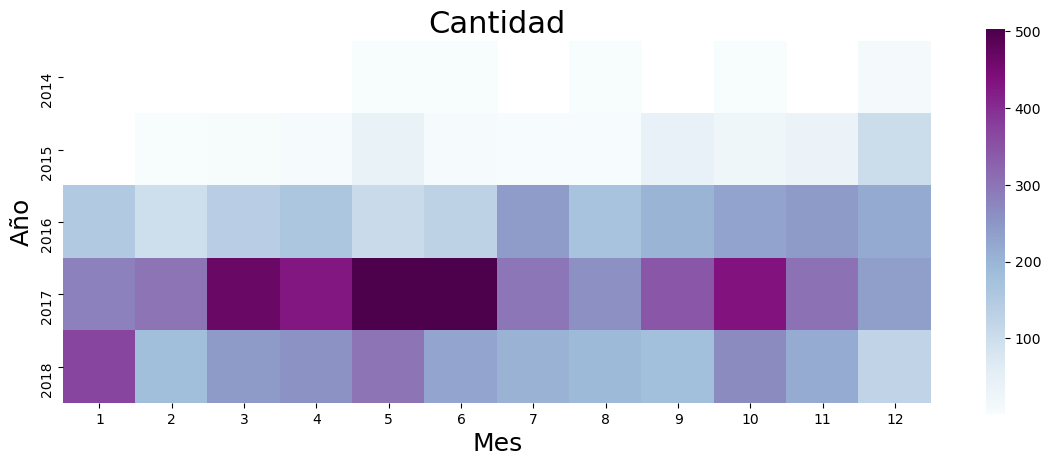

In [101]:
fig, ax = plt.subplots(figsize=(14,5))
g = sns.heatmap(heat_timeW,  cmap="BuPu", ax=ax, robust=True, square=True)
g.set_title("Cantidad", fontsize=22)
g.set_xlabel("Mes",fontsize=18)
g.set_ylabel("Año", fontsize=18)

In [75]:
df['Last_Modified_Date_MM'] = pd.DatetimeIndex(df['Last_Modified_Date']).month.astype(int)
df['Last_Modified_Date_MM'].value_counts()

2     6558
12    3739
9     1065
3      904
6      777
4      660
7      622
10     612
11     588
1      546
5      440
8      436
Name: Last_Modified_Date_MM, dtype: int64

In [76]:
pf_pivot_MM = df[df['Stage'].isin(stage_list)].pivot_table(index='Last_Modified_Date_MM', columns='Stage',\
                                values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
pf_pivot_MM

Stage,Closed Lost,Closed Won
Last_Modified_Date_MM,,
1,357,189
2,2127,4430
3,567,337
4,392,268
5,235,205
6,432,345
7,341,281
8,187,247
9,462,603


In [77]:
index = pf_pivot_MM.index.tolist()

Text(0.5, 1.0, 'T')

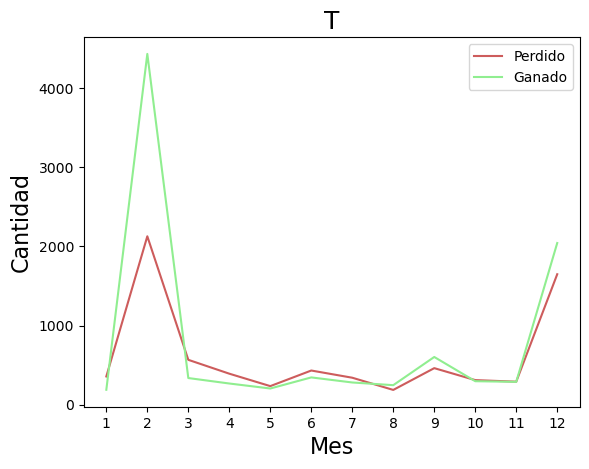

In [78]:
b = pf_pivot_MM[['Closed Lost','Closed Won']].plot(xticks = index ,color= ['indianRed','lightGreen'])
b.legend(["Perdido", "Ganado"])
b.set_ylabel('Cantidad',fontsize=16)
b.set_xlabel('Mes',fontsize=16)
b.set_title("T", fontsize=18)#, bbox=dict(facecolor='green', alpha=0.5))

In [79]:
df['Total_Amount_Currency'].value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: Total_Amount_Currency, dtype: int64

In [80]:
df_dolares = df[df['Total_Amount_Currency'] == 'USD']

In [81]:
df['Total_Amount_Currency']

0        EUR
1        EUR
2        USD
3        USD
4        USD
        ... 
16942    EUR
16943    EUR
16944    EUR
16945    USD
16946    USD
Name: Total_Amount_Currency, Length: 16947, dtype: category
Categories (5, object): ['AUD', 'EUR', 'GBP', 'JPY', 'USD']

In [82]:
df['Total_Amount'].value_counts()

     6,200.00    513
     4,400.00    461
    18,000.00    353
   140,000.00    272
     1,600.00    204
                ... 
   193,600.00      1
     4,972.80      1
 8,001,840.00      1
12,333,750.00      1
    11,960.00      1
Name: Total_Amount, Length: 8872, dtype: int64

In [85]:
prueba = df_dolares.groupby('Stage').agg({'Total_Amount': ['mean','count']})
prueba

Total_Amount      
                              mean count
Stage                                   
Closed Lost           3,210,571.28  3682
Closed Won              289,166.20  3592
Negotiation              97,164.19    16
Proposal                787,491.26    21
Qualification         1,098,307.00     3

In [ ]:
df_won = df[df['Stage'] == 'Closed Won']

In [ ]:
df_won['Bureaucratic_Code'].value_counts()